In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

#### Problem 2.2
Recreate figure 2.1, in R and/or Python. This is, in essence, problem 2.2

In [2]:
def simulator(N, simlen, fi):
    # Start at gen 1
    gen = 1

    # Initialize the population of haploids
    # 0 = ref, 1 = alt
    pop = np.concatenate((np.zeros(int((1-fi)*N)), np.full(int(fi*N),1)), axis = 0)

    # Make an array to store allele frequencies to plot later
    freq = np.full(1, fi)

    while gen < simlen:
        # Make an array to hold the next generation
        nextgen = np.empty(N)
        
        # Loop until you refill the array
        count = 0
        while count < N:
            # Select an individual at random from the current generation
            ind = pop[math.floor(random.random()*pop.size)]
            # Add them to the next generation
            nextgen[count] = ind
            count = count + 1

        # Calc the allele freq for the next gen
        unique, counts = np.unique(nextgen, return_counts=True)
        freqs = dict(zip(unique, counts))
        if 1 in freqs:
            freq = np.append(freq, freqs[1]/N)
        else:
            freq = np.append(freq, 0)

        # Set pop to be the next generation
        pop = nextgen
        gen = gen + 1
        
    # Return parameters for plotting
    return freq

In [3]:
rep = 0
replicates = 5
while rep < replicates:
    freq = simulator(40, 101, 0.2)
    if rep == 0:
        composite = freq
    else:
        composite = np.vstack([composite, freq])
    rep = rep + 1

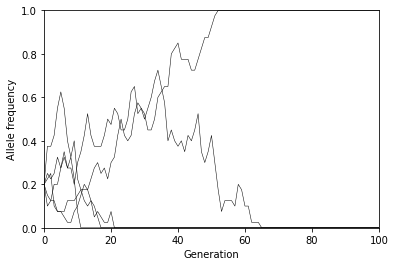

In [4]:
# Plot the output
fig, ax = plt.subplots(facecolor='w', edgecolor='black')
plt.plot(composite[0], color = 'black', linewidth='0.5')
plt.plot(composite[1], color = 'black', linewidth='0.5')
plt.plot(composite[2], color = 'black', linewidth='0.5')
plt.plot(composite[3], color = 'black', linewidth='0.5')
plt.plot(composite[4], color = 'black', linewidth='0.5')
ax.set_ymargin(0.0)
ax.set_xmargin(0.0)
ax.set_ylabel('Allele frequency');
ax.set_xlabel('Generation');
ax.set_ylim(0, 1);

#### Problem 2.3

For a single heterozygous individual, the probability that they become homozygous in the next generation is $\frac{1}{2}$. The number of generations until a success (becoming homozygous) is the mean of a geometric distribution, or $\frac{1}{p}$, where $p = \frac{1}{2}$. 

$\frac{1}{\frac{1}{2}} = 2$, so we would expect it to take 2 generations on average.

#### Assigned Problem 3

Plot the equation shown above Problem 2.3 over time, starting from some initial value. Run a bunch of sims (using your machinery from #1 above). Plot the heterozygosity from each simulated replicate over time, the mean over all replicates, and make sure you are matching that theoretical curve!

Equation:
$$ H_{t} = H_{0}(1-\frac{1}{2N})^t $$

In [5]:
# Do the simulations
rep = 0
replicates = 50
while rep < replicates:
    freq = simulator(40, 101, 0.5)
    if rep == 0:
        composite = freq
    else:
        composite = np.vstack([composite, freq])
    rep = rep + 1

In [6]:
# Convert allele frequencies into heterozygosity
# This assumes Hardy-Weinberg, which is fine because we meet the assumptions
def het(a):
    return 2*a*(1-a)

hets = np.vectorize(het)(composite[0])
for i in range(1, replicates):
    hets = np.vstack([hets, np.vectorize(het)(composite[i])])

In [7]:
# Function that calculates the theoretical expectation
def f(x):
    return 0.5*(1-(1/40))**x

# Create x & y for the theoretical expectation for plotting
x = np.linspace(0, 100, 101)
y = np.vectorize(f)(x)

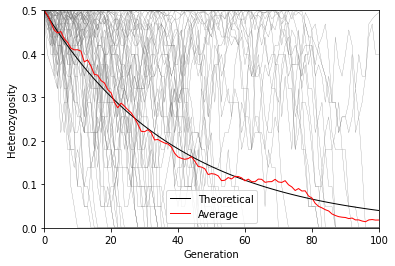

In [8]:
# Plot the output
fig, ax = plt.subplots(facecolor='w', edgecolor='black')
for i in range(0, replicates):
    plt.plot(hets[i], color = 'grey', linewidth='0.25')
plt.plot(x, y, color = 'black', linewidth='1', label='Theoretical')
plt.plot(hets.mean(axis = 0), color = 'red', linewidth='1', label='Average')
ax.set_ymargin(0.0)
ax.set_xmargin(0.0)
ax.set_ylabel('Heterozygosity');
ax.set_xlabel('Generation');
ax.set_ylim(0, 0.5)
plt.legend();

#### Assigned Problem 4
Work through Figure 2.3. This is a classic example of a coupled forward/backwards argument, and a conceptual precursor to "coalescent thinking". Many students in my undergrad class find this one rough.



Answer 1:  
The left figure represents the probability that two alleles are identical by descent. The second allele will come from the same individual with probability $\frac{1}{2N}$ where $N$ is the number of diploids in the population (not haploids).

The right figure represents the probability that two alleles are not identical by descent. This is the same as $1 - P(identical\space by\space descent)$ or $1 - \frac{1}{2N}$.

In order to get the total probability that two alleles chosen at random are identical by state ($G'$), you add the probability that they are identical by descent (because when you're identical by descent you're always identical by state) to the probability that they're not identical by state times the probability that the two alleles chosen are identical by state ($G$). (See equation 2.1.)

Answer 2:  
I'm guessing this question should actually reference figure 2.4 (?), so I'll explain that one here too. Time flows from left (ancient) to right (recent). Each dot on the branch represents a mutation. Mutations before the common ancestor of all our samples (at $t_w$) are shared by all samples, and thus are either fixed or lost already. Mutations after $t_w$ are polymorphic because only a subset of samples can trace their ancestry back to a branch containing that mutation. 

#### Assigned Problem 5
How would use use a simulation to verify Eqn 2.6? Provide an example of such a simulation. Hint: don't start p so small that pi(p) is very small.

Equation 2.6:
$$ \pi(p) = p $$

In English, equation 2.6 says that the probability of fixation of a neutral allele is its current frequency.

In [9]:
# Do the simulations
# Here we use an initial allele frequency of 0.15
rep = 0
replicates = 500
while rep < replicates:
    freq = simulator(40, 201, 0.15)
    if rep == 0:
        composite = freq
    else:
        composite = np.vstack([composite, freq])
    rep = rep + 1

The probability of fixation can be approximated by averaging the allele frequencies of all replicates for the final generation of the simulation. This may be slightly off due to alleles that are still polymorphic at the end of the simulation, but I've set the number of generations to be large enough that there should be very few of those.

In [10]:
# Compute averages for all generations
averages = composite.mean(axis = 0)
# Display the value for the last generation
# It should be pretty darned close to the initial frequency, or 0.15
averages[200]

0.15694999999999998

#### Problem 2.10

$$ 4N \times 10^{-7} \times 20 = 0.1 $$

$$ N = 12,500 $$

Because $N_e$ is based on the harmonic mean of historic population sizes, this is reasonable.

In [11]:
import os
os.system('jupyter nbconvert --to html GillespieCh2.ipynb');